# Thresholding

The idea of thresholding is to further-simplify visual data for analysis. First, you may convert to gray-scale, but then you have to consider that grayscale still has at least 255 values. What thresholding can do, at the most basic level, is convert everything to white or black, based on a threshold value. Let's say we want the threshold to be 125 (out of 255), then everything that was 125 and under would be converted to 0, or black, and everything above 125 would be converted to 255, or white. If you convert to grayscale as you normally will, you will get white and black. If you do not convert to grayscale, you will get thresholded pictures, but there will be color.

##### Importing essential libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

##### Reading image of a book-page clicked in low light using openCV and converting it into numpy-array

In [2]:
page = cv.imread('bookpage.jpg')
page = np.array(page)

##### Defining a function to display images

In [3]:
def display(images, titles = None, cmap = 'gray', save = False, fname = None):
    col = 3
    row = len(images)/(col-1)+1
    fig = plt.figure(figsize=(32,32))
    for i in range(len(images)):
        ax = fig.add_subplot(row, col, i+1)
        if(titles != None):
            ax.set_title(titles[i])
        plt.imshow(images[i], cmap = cmap)
    if(save == True):
        fig.savefig(fname = fname)
    plt.show()

##### Let's have a look at the original image

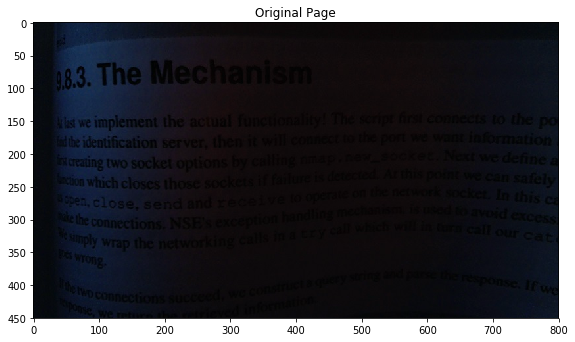

In [4]:
display([page], ['Original Page'])

##### As we saw, the original image is very difiucult to read. So let's try to threshold it using binary threshold

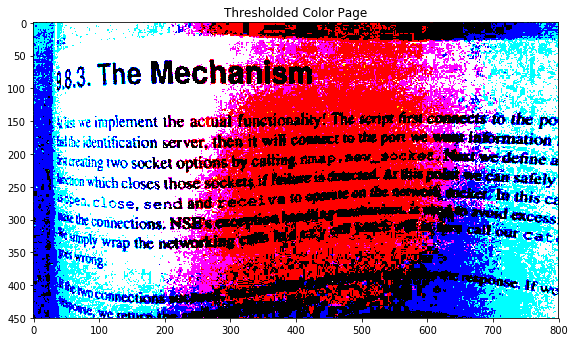

In [5]:
ret, threshold = cv.threshold(page, 12, 255, cv.THRESH_BINARY)
display([threshold], ['Thresholded Color Page'])

##### Although the thresholded image helped us to read with little bit more ease on the darker region, it's still hard to read it. So let's convert it into grayscale first and then threshold it with two different parameter

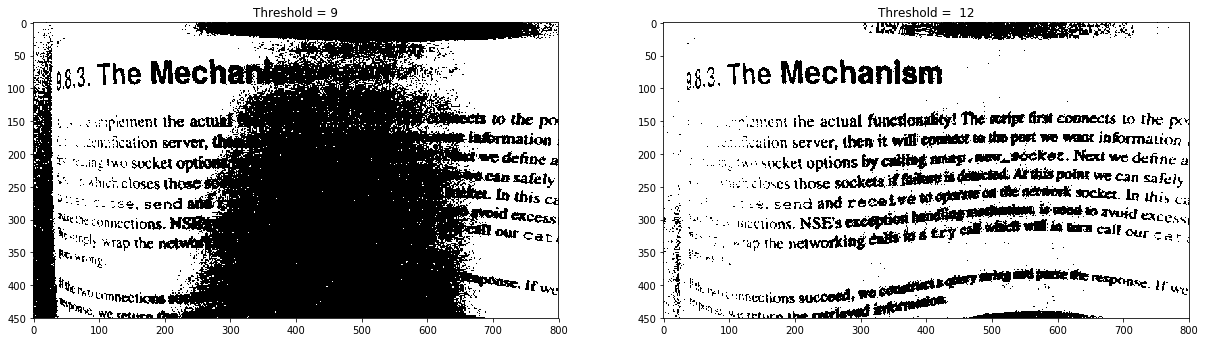

In [6]:
gray_page = cv.cvtColor(page, cv.COLOR_BGR2GRAY)
ret2, threshold2 = cv.threshold(gray_page, 12, 255, cv.THRESH_BINARY)
ret2_1, threshold2_1 = cv.threshold(gray_page, 9, 255, cv.THRESH_BINARY)
titles = ['Threshold = 9', 'Threshold =  12']
display([threshold2, threshold2_1], titles)

##### And yeah! we failed again. The Bright region became more brighter and so its unreadable now
##### Now let's try with Gaussian Adaptive Threshold as it determines the threshold for pixel based on small rigion and so different region will will be thresholded with different threshold-value and gives better result.

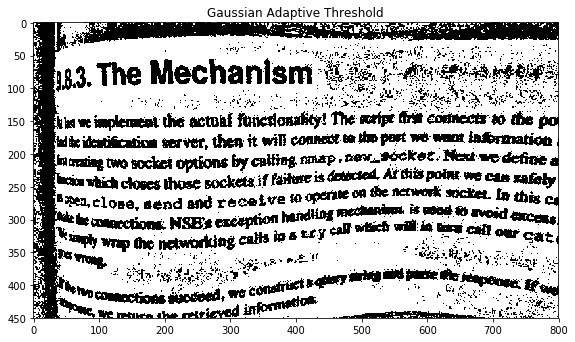

In [7]:
gaus = cv.adaptiveThreshold(gray_page, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 115, 1)
display([gaus], ['Gaussian Adaptive Threshold'])

##### Let's look at the image using openCV to make it more clear

In [8]:
cv.imshow('Gaus', gaus)
cv.waitKey(0)
cv.destroyAllWindows()

##### Now, have a look on all the thresholded image 

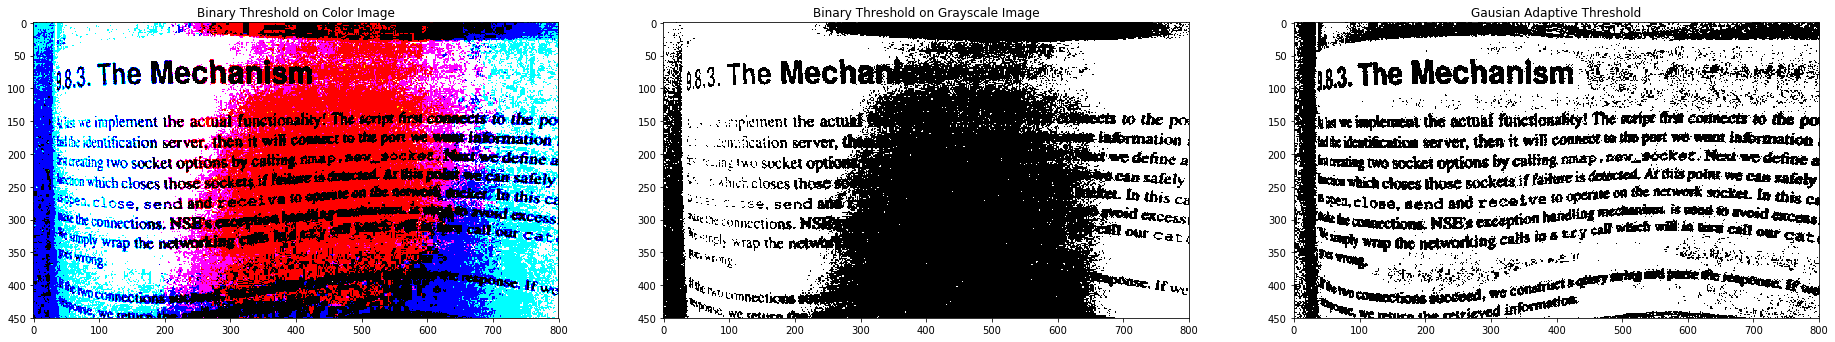

In [9]:
thresholds = [threshold, threshold2, gaus]
titles = ['Binary Threshold on Color Image', 'Binary Threshold on Grayscale Image', 'Gausian Adaptive Threshold']
display(thresholds, titles)

### Conclusion :-
##### So here we can see Gausian Adaptive Threshold worked pretty well
##### But, this can't be the case everywhere, different type of images need different thresholds!